In [1]:
import QuantLib as ql

In [2]:
reversion = 0.01
evalDate = ql.Date(31,5,2019)
number_of_scenarios = 250
seed = 42
stress = False
shifted_lognormal = False

In [3]:
leh_x = [1.0/12.0, 3.0/12.0, 6.0/12.0, 9.0/12.0, 1.0, 2.0] # swaps
leh_y = [1.0, 2.0] # options
leh_z = ql.Matrix(2,6)
leh_z[0][0] = 0.01111
leh_z[0][1] = 0.0112
leh_z[0][2] = 0.010265
leh_z[0][3] = 0.0103
leh_z[0][4] = 0.00985
leh_z[0][5] = 0.008580
leh_z[1][0] = 0.0139
leh_z[1][1] = 0.0128
leh_z[1][2] = 0.01084
leh_z[1][3] = 0.01012
leh_z[1][4] = 0.009635
leh_z[1][5] = 0.008545

In [4]:
leh_i = ql.BilinearInterpolation(leh_x, leh_y, leh_z)

In [5]:
#leh_i.enableExtrapolation()

In [6]:
lehmanBpVols = [leh_i(x,y, True) for (x,y) in [(1.0/12.0,23.0/12.0), (2.0/12.0, 22.0/12.0), (3.0/12.0, 21.0/12.0),
                                               (6.0/12.0, 18.0/12.0), (9.0/12.0, 15.0/12.0), (1.0,1.0), (18.0/12.0, 6.0/12.0)]]

In [7]:
lehmanBpVols

[0.013667499999999999,
 0.012984166666666665,
 0.012400000000000001,
 0.0105525,
 0.010255,
 0.00985,
 0.009277500000000001]

In [8]:
settlDate = ql.TARGET().advance(evalDate, ql.Period("2D"))

In [9]:
ql.Settings.instance().evaluationDate = evalDate

In [10]:
print ("evaluation date is ", evalDate)
print ("mean reversion is ", reversion)

evaluation date is  May 31st, 2019
mean reversion is  0.01


In [11]:
eureonia = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.004)), ql.Actual365Fixed())
eurstd = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.002)), ql.Actual365Fixed())
eur1m = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.0035)), ql.Actual365Fixed())
eur3m = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.003)), ql.Actual365Fixed())
eur6m = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.002)), ql.Actual365Fixed())
eur1y = ql.FlatForward(evalDate, ql.QuoteHandle(ql.SimpleQuote(-0.001)), ql.Actual365Fixed())

eonia = ql.Eonia(ql.YieldTermStructureHandle(eureonia))
euribor1m = ql.Euribor1M(ql.YieldTermStructureHandle(eur1m))
euribor3m = ql.Euribor3M(ql.YieldTermStructureHandle(eur3m))
euribor6m = ql.Euribor6M(ql.YieldTermStructureHandle(eur6m))
euribor1y = ql.Euribor1Y(ql.YieldTermStructureHandle(eur1y))

In [12]:
printForwards = True

if (printForwards):
    print("date;startDate;MaturityDate;forward rate;instantaneous forward rate")
    print("eonia")
    print("dcc curve: ",eureonia.dayCounter())
    print("dcc index: ",eonia.dayCounter())
    
    d=evalDate
    while (d <= ql.TARGET().advance(evalDate, ql.Period("1Y"))):
        start = eonia.valueDate(d)
        end = eonia.maturityDate(start)
        print(d.ISO(), ";", start.ISO(), ";", end.ISO(), ";", eureonia.zeroRate(d, ql.Actual365Fixed(), ql.Continuous).rate(), ";",
             eonia.fixing(d), ";", eureonia.forwardRate(start, end, ql.Actual360(), ql.Simple).rate(), ";",
             (eureonia.discount(start)/eureonia.discount(end) - 1) / ((end -start)/360.0))
        d = ql.TARGET().advance(d, ql.Period("1D"))
        if (d> evalDate+10):
            break

    print("eur1M")
    print("dcc curve: ",eur1m.dayCounter())
    print("dcc index: ",euribor1m.dayCounter())
    
    d=evalDate
    while (d <= ql.TARGET().advance(evalDate, ql.Period("1Y"))):
        print(d.ISO(), ";", eur1m.zeroRate(d, ql.Actual365Fixed(), ql.Continuous).rate(), ";",
             euribor1m.fixing(d), ";", eur1m.forwardRate(d, d+ql.Period("1D"), ql.Actual365Fixed(), ql.Continuous).rate())
        d = ql.TARGET().advance(d, ql.Period("1D"))
        if (d> evalDate+10):
            break
            
    print("eur3M")
    print("dcc curve: ",eur3m.dayCounter())
    print("dcc index: ",euribor3m.dayCounter())
    
    d=evalDate
    while (d <= ql.TARGET().advance(evalDate, ql.Period("1Y"))):
        print(d.ISO(), ";", eur3m.zeroRate(d, ql.Actual365Fixed(), ql.Continuous).rate(), ";",
             euribor3m.fixing(d), ";", eur3m.forwardRate(d, d+ql.Period("1D"), ql.Actual365Fixed(), ql.Continuous).rate())
        d = ql.TARGET().advance(d, ql.Period("1D"))
        if (d> evalDate+10):
            break 
            
    print("eur6M")
    print("dcc curve: ",eur6m.dayCounter())
    print("dcc index: ",euribor6m.dayCounter())
    
    d=evalDate
    while (d <= ql.TARGET().advance(evalDate, ql.Period("1Y"))):
        print(d.ISO(), ";", eur6m.zeroRate(d, ql.Actual365Fixed(), ql.Continuous).rate(), ";",
             euribor6m.fixing(d), ";", eur6m.forwardRate(d, d+ql.Period("1D"), ql.Actual365Fixed(), ql.Continuous).rate())
        d = ql.TARGET().advance(d, ql.Period("1D"))
        if (d> evalDate+10):
            break    
            
    print("eur1Y")
    print("dcc curve: ",eur1y.dayCounter())
    print("dcc index: ",euribor1y.dayCounter())
    
    d=evalDate
    while (d <= ql.TARGET().advance(evalDate, ql.Period("1Y"))):
        print(d.ISO(), ";", eur1y.zeroRate(d, ql.Actual365Fixed(), ql.Continuous).rate(), ";",
             euribor1y.fixing(d), ";", eur1y.forwardRate(d, d+ql.Period("1D"), ql.Actual365Fixed(), ql.Continuous).rate())
        d = ql.TARGET().advance(d, ql.Period("1D"))
        if (d> evalDate+10):
            break     

date;startDate;MaturityDate;forward rate;instantaneous forward rate
eonia
dcc curve:  Actual/365 (Fixed) day counter
dcc index:  Actual/360 day counter
2019-05-31 ; 2019-05-31 ; 2019-06-03 ; -0.003999999999644115 ; -0.0039451406274748635 ; -0.0039451406274748635 ; -0.0039451406274748635
2019-06-03 ; 2019-06-03 ; 2019-06-04 ; -0.004000000000004982 ; -0.003945183861997492 ; -0.003945183861997492 ; -0.003945183861997492
2019-06-04 ; 2019-06-04 ; 2019-06-05 ; -0.004000000000004968 ; -0.003945183861957524 ; -0.003945183861957524 ; -0.003945183861957524
2019-06-05 ; 2019-06-05 ; 2019-06-06 ; -0.004000000000000169 ; -0.003945183861957524 ; -0.003945183861957524 ; -0.003945183861957524
2019-06-06 ; 2019-06-06 ; 2019-06-07 ; -0.004000000000000716 ; -0.003945183861957524 ; -0.003945183861957524 ; -0.003945183861957524
2019-06-07 ; 2019-06-07 ; 2019-06-10 ; -0.003999999999999372 ; -0.003945140627461541 ; -0.003945140627461541 ; -0.003945140627461541
2019-06-10 ; 2019-06-10 ; 2019-06-11 ; -0.00399

In [13]:
swapIndexBase = ql.EuriborSwapIsdaFixA(ql.Period("10Y"))

In [14]:
opt_tenors = [ql.Period(1,ql.Years),ql.Period(2,ql.Years)]
swap_tenors = [ql.Period(1,ql.Years),ql.Period(2,ql.Years)]
atm_quotes = [[ql.QuoteHandle(ql.SimpleQuote(0.005))]*2 for i in opt_tenors]
swvol = ql.SwaptionVolatilityMatrix(ql.TARGET(), ql.ModifiedFollowing, opt_tenors, swap_tenors,
                                    atm_quotes, ql.Actual365Fixed(), True, ql.Normal)

In [15]:
swvol.volatility(evalDate+ql.Period("1Y"), ql.Period("1Y"), 0.0)

0.005

In [16]:
eonia1m = ql.OvernightIndexedSwapIndex("eoniaswap", ql.Period("1M"), 0 , ql.EURCurrency(), eonia)
eonia3m = ql.OvernightIndexedSwapIndex("eoniaswap", ql.Period("3M"), 0 , ql.EURCurrency(), eonia)
eonia6m = ql.OvernightIndexedSwapIndex("eoniaswap", ql.Period("6M"), 0 , ql.EURCurrency(), eonia)
eonia1y = ql.OvernightIndexedSwapIndex("eoniaswap", ql.Period("1Y"), 0 , ql.EURCurrency(), eonia)

In [17]:
eur1m3m = ql.SwapIndex("eur1m", ql.Period("3M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor1m)
eur1m6m = ql.SwapIndex("eur1m", ql.Period("6M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor1m)
eur1m3y = ql.SwapIndex("eur1m", ql.Period("12M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor1m)

In [18]:
eur3m6m = ql.SwapIndex("eur3m", ql.Period("6M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor3m)
eur3m1y = ql.SwapIndex("eur3m", ql.Period("12M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor3m)
eur6m1y = ql.SwapIndex("eur6m", ql.Period("12M"), 2, ql.EURCurrency(), ql.TARGET(), ql.Period("3M"), ql.ModifiedFollowing, 
                      ql.Actual360(), euribor6m)

In [19]:
# Health check: Zero Curves
print("t;eonia;std;eur1m;eur3m;eur6m;eur1y")
t=0.1
while(t<60.0):
    print(t,";",eureonia.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
          eurstd.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
          eur1m.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
          eur3m.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
          eur6m.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
          eur1y.zeroRate(t,ql.Continuous,ql.NoFrequency).rate(),";",
         )
    t+=0.1
    if t>1.5:
        break

t;eonia;std;eur1m;eur3m;eur6m;eur1y
0.1 ; -0.003999999999998664 ; -0.002000000000000997 ; -0.0034999999999985477 ; -0.0029999999999997876 ; -0.002000000000000997 ; -0.0010000000000000135 ;
0.2 ; -0.004000000000000047 ; -0.001999999999999332 ; -0.0035000000000001423 ; -0.0029999999999998435 ; -0.001999999999999332 ; -0.0010000000000004985 ;
0.30000000000000004 ; -0.003999999999999952 ; -0.0019999999999998955 ; -0.003499999999999893 ; -0.00299999999999991 ; -0.0019999999999998955 ; -0.0009999999999999291 ;
0.4 ; -0.00399999999999988 ; -0.0020000000000000235 ; -0.0035000000000000404 ; -0.0029999999999999645 ; -0.0020000000000000235 ; -0.000999999999999666 ;
0.5 ; -0.003999999999999976 ; -0.002000000000000162 ; -0.0035000000000001497 ; -0.0030000000000002004 ; -0.002000000000000162 ; -0.000999999999999737 ;
0.6 ; -0.003999999999999958 ; -0.0019999999999999766 ; -0.003500000000000256 ; -0.0029999999999997316 ; -0.0019999999999999766 ; -0.000999999999999948 ;
0.7 ; -0.004000000000000042 ; -0

In [20]:
# Health check: Todays Fixings and 1w fixings
print("index;fixToday;fix1wFwd")
print("eonia;",eonia.fixing(evalDate),";",eonia.fixing(evalDate+7))
print("eur1m;",euribor1m.fixing(evalDate),";",euribor1m.fixing(evalDate+7))
print("eur3m;",euribor3m.fixing(evalDate),";",euribor3m.fixing(evalDate+7))
print("eur6m;",euribor6m.fixing(evalDate),";",euribor6m.fixing(evalDate+7))
print("eur1y;",euribor1y.fixing(evalDate),";",euribor1y.fixing(evalDate+7))

index;fixToday;fix1wFwd
eonia; -0.0039451406274748635 ; -0.003945140627461541
eur1m; -0.0034515583136980332 ; -0.0034515583136993655
eur3m; -0.0029577856825606075 ; -0.0029577856825606075
eur6m; -0.001971614066649034 ; -0.0019716140666488154
eur1y; -0.0009858070333244077 ; -0.0009858070333242984


In [21]:
# Build coterminal calibration basket (to cover 2 years)
endDate = ql.TARGET().advance(settlDate, ql.Period("2Y"))
expiries = [ql.TARGET().advance(evalDate, ql.Period(p)) for p in ["1M", "2M", "3M", "6M", "9M", "1Y", "18M"]] 
# since the last simulated fixing is evalDate + 1y, this is more than enough

In [22]:
swapTenors = [ql.Period(p) for p in ["23M", "22M", "21M", "18M", "15M", "1Y", "6M"]]

In [23]:
swapTenors

[Period("1Y11M"),
 Period("1Y10M"),
 Period("1Y9M"),
 Period("1Y6M"),
 Period("1Y3M"),
 Period("1Y"),
 Period("6M")]

In [24]:
volStepDates = expiries[:-1]

In [25]:
vols = [ql.QuoteHandle(ql.SimpleQuote(0.01)) for i in expiries]

In [26]:
model = ql.Gsr(ql.YieldTermStructureHandle(eureonia), volStepDates, vols, [ql.QuoteHandle(ql.SimpleQuote(reversion))], 5.0) 
# fix fwd measure to safely cover the calibration instruments

In [27]:
swaptionEngine = ql.Gaussian1dSwaptionEngine(model)

In [28]:
swvol.swapLengths()

(1.0, 2.0)

In [29]:
endDate

Date(4,6,2021)

In [30]:
basket = []

if (stress):
    print("input vols for stress scenarios")
for i in range(0, len(expiries)):
    expiry = expiries [i]
    texp = swvol.timeFromReference(expiry)
    #swplen = swvol.swapLengths()
    #swplen = expiry+swapTenors[i]
    swplen = swapTenors[i]
    swaptionSettlDate = ql.TARGET().advance(expiries[i], ql.Period("2D"))

    # calculate ATM level
    # What we cannot repair here is that the input swaption surface is mixed 3m / 6m
    # we simply assume to have a 6m surface...
    fixedSchedule = ql.Schedule(swaptionSettlDate, endDate, ql.Period("1Y"), ql.TARGET(),
                               euribor6m.businessDayConvention(), euribor6m.businessDayConvention(),
                               ql.DateGeneration.Forward, False)
    floatSchedule = ql.Schedule(swaptionSettlDate, endDate, euribor6m.tenor(), ql.TARGET(),
                           euribor6m.businessDayConvention(), euribor6m.businessDayConvention(),
                           ql.DateGeneration.Forward, False)
    
    swapEngine = ql.DiscountingSwapEngine(ql.YieldTermStructureHandle(eureonia))
    
    temp = ql.VanillaSwap(ql.VanillaSwap.Receiver, 1.0, fixedSchedule, 0.0, ql.Thirty360(),
                         floatSchedule, euribor6m, 0.0, ql.Actual360())
    temp.setPricingEngine(swapEngine)
    forward = temp.fairRate()
    
    # normal case
    vol = swvol.volatility(expiry, swplen, forward, True)
    
    if (stress):
        if (shifted_lognormal):
            if (forward > 0.0):
                vol = lehmanBpVols[i] / forward
            else:
                print("forward for expiry ", expiry, " is not positive (", forward, ") using 100% as fall back")
                vol = 1.00
            print("expiry ", expiry, " convert lehman bp vol ", lehmanBpVols[i], " to ", vol, " (forward is ", forward, ")")
        else: # normal vols
            vol = lehmanBpVols[i]
            print("expiry ", expiry, " using lehman bp vol ", vol)
    
    volQuote = ql.QuoteHandle(ql.SimpleQuote(vol))
    
    volType = ql.Normal
    if shifted_lognormal:
        volType = ql.ShiftedLognormal
    
    h = ql.SwaptionHelper(swaptionSettlDate, endDate, volQuote, euribor6m, ql.Period("1Y"), ql.Thirty360(),
                         ql.Actual360(), ql.YieldTermStructureHandle(eureonia), ql.SwaptionHelper.RelativePriceError,
                         ql.nullDouble(), 1.0, volType)
    h.setPricingEngine(swaptionEngine)
    basket += [h]

In [31]:
basket

[<QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3870> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA39F0> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3AB0> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3F30> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3E70> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3CF0> >,
 <QuantLib.QuantLib.SwaptionHelper; proxy of <Swig Object of type 'boost::shared_ptr< SwaptionHelper > *' at 0x000001D40CBA3DB0> >]

In [32]:
# calibrate model
opt = ql.LevenbergMarquardt()
ec = ql.EndCriteria(10000, 100, 1e-8, 1e-8, 1e-8)
constraint = ql.NoConstraint()
model.calibrateVolatilitiesIterative(basket, opt, ec, constraint)

In [33]:
print ("calibrated model parameters (reversion is ", reversion, "):")
print("expiry;end;strike;marketvol;marketvalue;modelvalue;modelvol")
for i, helper in enumerate(basket):
    print(helper.swaption().exercise().date(0).ISO(),";",helper.underlyingSwap().fixedLeg()[-1].date().ISO(),";",helper.underlyingSwap().fixedRate(),";"
          ,helper.volatility().value(),";",helper.marketValue(),";",helper.modelValue(),";",model.volatility()[i])

calibrated model parameters (reversion is  0.01 ):
expiry;end;strike;marketvol;marketvalue;modelvalue;modelvol
2019-07-03 ; 2021-06-04 ; -0.002001211407497019 ; 0.005000000000000001 ; 0.001154983580435568 ; 0.0010481693333145882 ; 0.004557147060025789
2019-08-02 ; 2021-06-04 ; -0.001999825655262357 ; 0.005 ; 0.0015241919484777554 ; 0.0014521725995318279 ; 0.005063882475245423
2019-09-04 ; 2021-06-04 ; -0.001998226463006435 ; 0.005 ; 0.0017959172586741515 ; 0.0017405722152249747 ; 0.005070586983609215
2019-12-04 ; 2021-06-04 ; -0.001999582513706047 ; 0.005 ; 0.002148131702176715 ; 0.0021142525820504712 ; 0.005050632392753586
2020-03-04 ; 2021-06-04 ; -0.002000899981909456 ; 0.005 ; 0.0021821836953499173 ; 0.0021591261597197365 ; 0.005055473945300385
2020-06-03 ; 2021-06-04 ; -0.0019970879870761585 ; 0.005 ; 0.0020162153723323867 ; 0.00200035402682944 ; 0.005084463016201255
2020-12-02 ; 2021-06-04 ; -0.0019935263504098355 ; 0.005 ; 0.0012353146574336268 ; 0.001235314657433675 ; 0.0051599

In [34]:
scenarioDates = []
scenarioTimes = []
for i in range(0,371):
    scenarioDates += [evalDate + i]
    scenarioTimes += [model.termStructure().timeFromReference(scenarioDates[-1])]

In [35]:
tGrid = ql.TimeGrid(scenarioTimes)

In [36]:
process = model.stateProcess()

In [37]:
USG = ql.MersenneTwisterUniformRsg(len(scenarioTimes)-1, seed)

In [38]:
ICN = ql.InverseCumulativeNormal()

In [39]:
ICNSG = ql.InvCumulativeMersenneTwisterGaussianRsg(USG, ICN)

In [40]:
pathGen = ql.InvCumulativeMersenneTwisterPathGenerator(process, tGrid, ICNSG, False)

In [41]:
print("path;date;t;zveonia;zveur1m;zveur3m;zveur6m;zveur1y;eonia;eur1m;eur3m;eur6m;eur1y")
scenNo = 0
while (scenNo < number_of_scenarios):
    print("Generating scenario # ", scenNo)
    p = pathGen.next()
    for i in range(0, len(tGrid)):
        if (ql.TARGET().isBusinessDay(scenarioDates[i])):
            # this is absolutely insane, we normalize x(t) only to calculate it back to x(t) in the model methods later on...
            y = (p.value()[i] - process.expectation(0.0, 0.0, scenarioTimes[i])) / process.stdDeviation(0.0, 0.0, scenarioTimes[i])
            print(scenNo, ";", scenarioDates[i].ISO(), ";", tGrid[i], ";", eonia.fixing(scenarioDates[i]), ";", 
                 euribor1m.fixing(scenarioDates[i]),";",euribor3m.fixing(scenarioDates[i]),";",euribor6m.fixing(scenarioDates[i]),";",
                 euribor1y.fixing(scenarioDates[i]),";", model.forwardRate(scenarioDates[i], scenarioDates[i], y, eonia),";",
                 model.forwardRate(scenarioDates[i], scenarioDates[i], y, euribor1m), ";",
                 model.forwardRate(scenarioDates[i], scenarioDates[i], y, euribor3m), ";",
                 model.forwardRate(scenarioDates[i], scenarioDates[i], y, euribor6m), ";",
                 model.forwardRate(scenarioDates[i], scenarioDates[i], y, euribor1y))
        else:
            pass
    scenNo+=1
    break
print("Done")    
    

path;date;t;zveonia;zveur1m;zveur3m;zveur6m;zveur1y;eonia;eur1m;eur3m;eur6m;eur1y
Generating scenario #  0


ZeroDivisionError: float division by zero

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

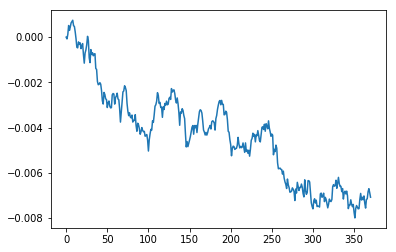

In [49]:
plt.plot(p.value())

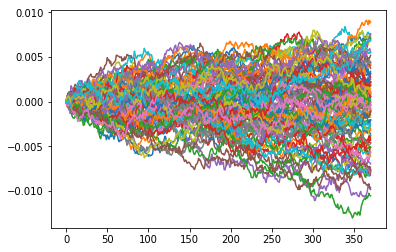

In [68]:
for i in range(0,100):
    p = pathGen.next()
    plt.plot(p.value())

In [ ]:
process.stdDeviation(0.0, 0.0, scenarioTimes[i])